### Assignment 6 -- Clustering

#### 2nd Problem Statement

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Dataset-->crime_data.csv

### Hierarchical Clustering

In [1]:
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
#import the required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
#Loading the Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/crime_data.csv")
Dataset.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
#To Check NA Values
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


Inference: 

No NA Values Present.

Normalization of Value is required Because value are not on same Scale,as Euclidean Distance is influenced by different scale value

Also Dropping 1st Column as it is object/string dtype.

#### Normalization function

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # Giving 0,1 through MinMaxScaler as Normalization values are 0,1

#Fitting the Normalize Value and Droping the 1st unnamed column as it is categorial
rescaledX = scaler.fit_transform(Dataset.iloc[:,1:])

In [5]:
#Converting into a Dataframe as Normalization Function gives an array of values
scaled_value = pd.DataFrame(rescaledX)

#### Using Single Linkage -- Nearest neighbor(DataPoints)

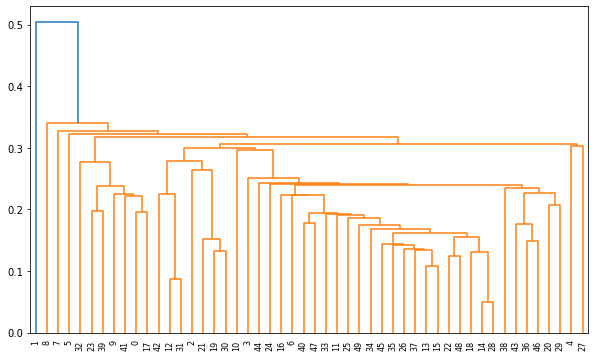

In [6]:
# create dendrogram
plt.figure(figsize = (10,6))
dendrogram = sch.dendrogram(sch.linkage(scaled_value, method='single'))

In [7]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')

Inference: Creating No of Clusters = 5 , using Euclidean Distance, Linkage method = Single

In [8]:
# save clusters for chart
y_hc = hc.fit_predict(scaled_value)

#Creating a Dataframe of Clusters
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,0
1,3
2,0
3,0
4,0


In [9]:
#Appending the original Dataset with Clusters
Final = pd.concat([Dataset,Clusters], axis = 1)
Final

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


#### Cluster Profile

In [10]:
#Extracting Data Based on Particular Cluster
list(np.where(Final.Clusters==0))

[array([ 0,  2,  3,  4,  6,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
        38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], dtype=int64)]

##### Inference: Gives the List of Data Belonging to 0 Cluster

In [11]:
#Profile
Final.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,7.613043,163,65.195652,20.232609
1,1,5.900000,238,72.000000,15.800000
2,2,15.400000,335,80.000000,31.900000
3,3,10.000000,263,48.000000,44.500000
4,4,7.900000,204,78.000000,38.700000


Inference: Cluster 0 has the worst areas as they have the highest records for most features which indicates they have the highest crime rate

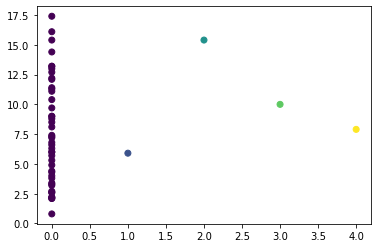

In [12]:
#Plot of Clusters
plt.figure(figsize = (6,4))
plt.scatter(Final['Clusters'],Final['Murder'], c = hc.labels_)

#### Inference of Hierarchical Clustering

In Hierarchical Clustering Used Single Linkage and Created 5 Clusters, Most Datapoints comes in the first cluster i.e 0th Cluster

### K-Means Clustering

In [13]:
#import K-means clustering libraries
from sklearn.cluster import KMeans

In [14]:
#Loading the Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/crime_data.csv")
Dataset.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Inference: 

No NA Values Present.

Standardization/Normalization of Value is required Because value are not on same Scale,as Euclidean Distance is influenced by different scale value

Also Dropping 1st Column as it is object/string dtype.

In [15]:
# Standardization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fillting the Standardize Value and Droping the 1st column as it is categorial
scaled_df = scaler.fit_transform(Dataset.iloc[:,1:])

#### Elbow Graph / scree plot
How to find optimum number of  cluster

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

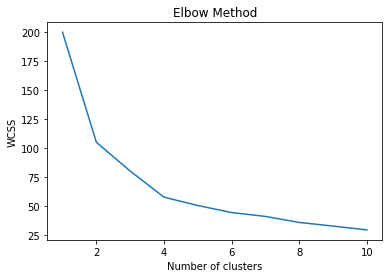

In [16]:
#wcss- within cluster sum of square
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42) # will start at 42(randam_state)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

#Plotting the Elbow Graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Inference: the optimum value of K would be 2 it can been through figure

In [17]:
wcss_dataframe = pd.DataFrame(wcss, columns=["wcss value"])
wcss_dataframe

,wcss value
0,200.000000
1,104.961633
2,80.085695
3,57.554259
4,50.333274
5,44.259808
6,40.912667
7,35.695877
8,32.575100
9,29.253499


inference: As it can be seen after first Partition within cluster sum of square i.e. variabilty decrease Drastically after that third or fourth parition it decrease very less so we can consider 2 or 4 as k value

In [18]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(2, random_state=42)
clusters_new.fit(scaled_df)

KMeans(n_clusters=2, random_state=42)

Inference: K = 2 i.e no of clusters = 2

In [19]:
#Fetching the cluster by its labels
clusters_new.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

#### The Cluster Profiling

In [20]:
#Assign clusters to the data set
Dataset['clusterid_new'] = clusters_new.labels_
Dataset

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [21]:
#Profile --by Clusters & mean
Dataset.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.870,114.433333,63.633333,15.943333
1,1,12.165,255.250000,68.400000,29.165000


Inference: Cluster 1 has the worst areas as they have the highest mean for most features which indicates they have the highest crime rate

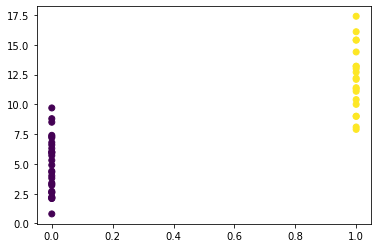

In [22]:
#Plot of Clusters
plt.figure(figsize = (6,4))
plt.scatter(Dataset['clusterid_new'],Dataset['Murder'], c = clusters_new.labels_)

### DB Scan Clustering

In [23]:
#Loading the Required libraries
from sklearn.cluster import DBSCAN  # for DBScan

In [24]:
#Loading the Dataset
df = pd.read_csv("C:/Users/Akaash/Downloads/crime_data.csv");
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Inference: 

No NA Values Present.

Standardization/Normalization of Value is required Because value are not on same Scale,as Euclidean Distance is influenced by different scale value

Also Dropping 1st Column as it is object/string dtype.

In [25]:
# Standardization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Fillting the Standardize Value and Droping the 1st column as it is categorial
scaled_df = scaler.fit_transform(df.iloc[:,1:])

#### Building the DBScan Algorithms

for optimal value of eps: change eps if outliers are not between the industry standard noise/outliers i.e. betwwen 1% to 30%,

for optimal min_plt = D+1 where D = No of Columns

In [26]:
#Building the DBScan Algorithms
dbscan = DBSCAN(eps=1.2, min_samples=4)
dbscan.fit(scaled_df)

DBSCAN(eps=1.2, min_samples=4)

Inference:eps is the epsilon and min_samples is the min_pts parameter

In [27]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  1,  1, -1, -1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

Inference: The -1 values are outliers and by industry standard noise/outliers must be betwwen 1% to 30%, in this case it can be less then 30%. exactly 10% outliers

In [28]:
#Creating a DataFrame of these Cluster Value
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl.head()

,cluster
0,0
1,-1
2,1
3,1
4,-1


### The Cluster Profiling

In [29]:
#Appending cl Dataframe to the original Dataset
final = pd.concat([df,cl],axis =1)
final

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [30]:
#List of Outliers Datapoint
list(np.where(final.cluster==-1))

[array([ 1,  4,  5,  8, 27], dtype=int64)]

Inference: It gives the index of the Outliers Datapoints.

In [31]:
#Profile --by Clusters & mean
final.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,10.900000,266.000000,75.600000,40.340000
1,0,14.671429,251.285714,54.285714,21.685714
2,1,6.110526,143.394737,66.289474,18.634211


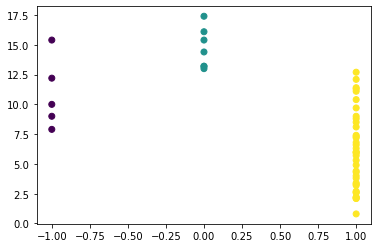

In [32]:
#Plot of Clusters
plt.figure(figsize = (6,4))
plt.scatter(final['cluster'],final['Murder'], c = dbscan.labels_)

Inference: Cluster -1 is the Outliers Datapoints which are Exactly 10% 